In [1]:
# read the data
crossing <- read.csv('/Users/alessia/Desktop/border_crossing/Border_Crossing_Entry_Data.csv')

In [2]:
# visualize header of the dataset
head(crossing)

,Port.Name,State,Port.Code,Border,Date,Measure,Value,Latitude,Longitude,Point
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
2,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Whitlash,Montana,3321,US-Canada Border,Jan 2024,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725)
5,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)
6,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Trucks,837,48.999,-95.377,POINT (-95.376555 48.999)


In [3]:
# view summary
summary(crossing)

  Port.Name            State             Port.Code       Border         
 Length:390305      Length:390305      Min.   : 101   Length:390305     
 Class :character   Class :character   1st Qu.:2304   Class :character  
 Mode  :character   Mode  :character   Median :3012   Mode  :character  
                                       Mean   :2447                     
                                       3rd Qu.:3401                     
                                       Max.   :3814                     
     Date             Measure              Value            Latitude    
 Length:390305      Length:390305      Min.   :      0   Min.   :25.95  
 Class :character   Class :character   1st Qu.:      0   1st Qu.:43.00  
 Mode  :character   Mode  :character   Median :    137   Median :48.50  
                                       Mean   :  28681   Mean   :43.98  
                                       3rd Qu.:   2912   3rd Qu.:49.00  
                                       Max.   :4447

In [4]:
# view number of categories for categorical variables
cat('Port name:', length(unique(crossing$Port.Name)), '\n')
cat('State:', length(unique(crossing$State)), '\n')
cat('Border:', length(unique(crossing$Border)), '\n')
cat('Date:', length(unique(crossing$Date)), '\n')
cat('Measure:', length(unique(crossing$Measure)), '\n')

Port name: 116 
State: 14 
Border: 2 
Date: 338 
Measure: 12 


In [5]:
# date in datetime format
crossing$Date <- as.Date(paste("15", crossing$Date), format = "%d %b %Y")

In [36]:
# group number of crossings by date
library(dplyr)
library(lubridate)

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(lubridate))

crossing_by_year <- crossing %>%
  group_by(year = year(Date)) %>%
  summarise(crossings = n())

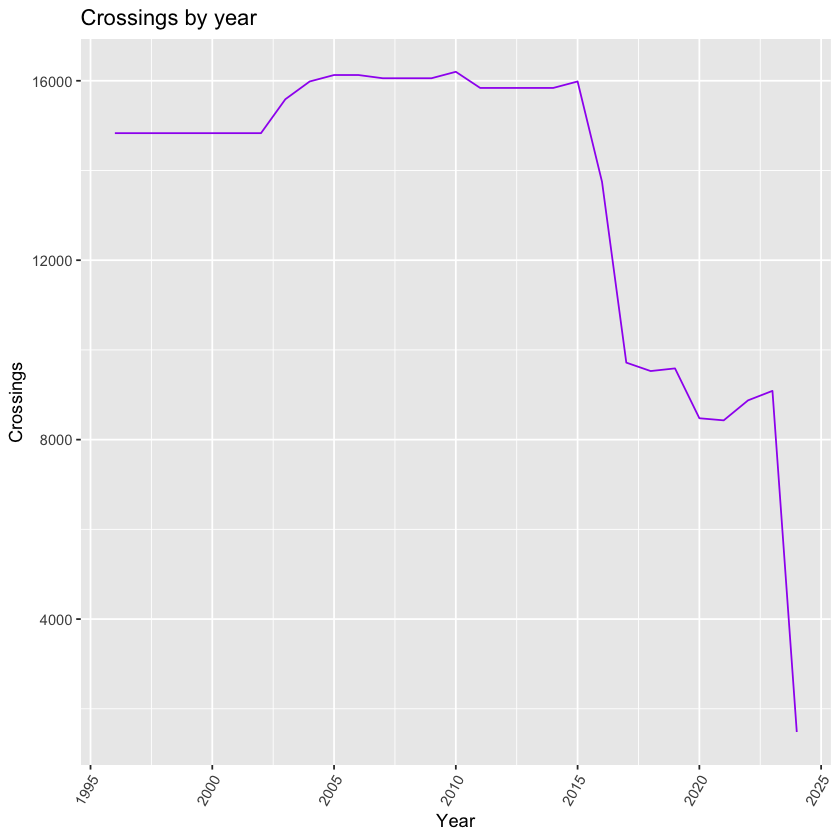

In [7]:
# view number of crossings aggregated by year
library(ggplot2)
ggplot(crossing_by_year, aes(year, crossings)) + 
geom_line(color = 'purple') +
labs(x = "Year", y = "Crossings") +
theme(axis.text.x=element_text(angle=60, hjust=1)) +
ggtitle('Crossings by year')

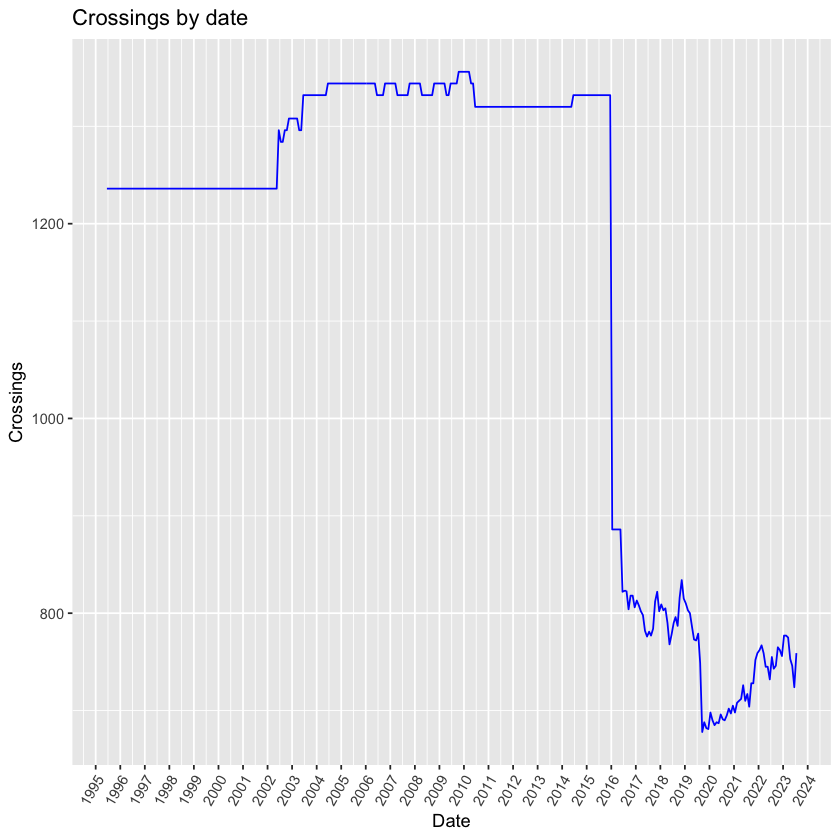

In [8]:
# view crossings by date
crossing_by_month <- crossing %>%
  group_by(date = Date) %>%
  summarise(crossings = n())

ggplot(crossing_by_month, aes(date, crossings)) + 
geom_line(color = 'blue') +
labs(x = "Date", y = "Crossings") +
scale_x_date(date_breaks = "12 months", date_labels = "%Y") +
theme(axis.text.x=element_text(angle=60, hjust=1)) +
ggtitle('Crossings by date')

Overall, border crossings in the years following 2016 have fallen drastically, with an additional sharp decrease corresponding to 2020, hypothetically due to the coronavirus pandemic. More data is available overall since 2016 on border crossings, according to the present dataset, which prompts questions about whether previous data could constitute an overestimation.

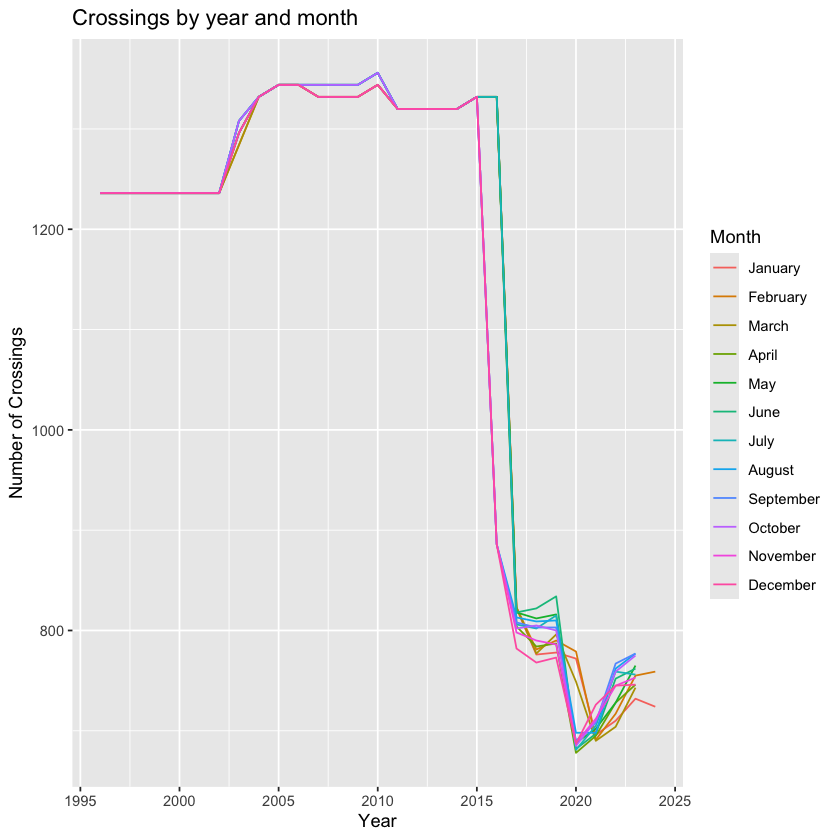

In [9]:
# border crossings by year and month

# convert date to year and month
crossing_by_month$year <- year(crossing_by_month$date)
crossing_by_month$month <- month(crossing_by_month$date)

# plot
ggplot(crossing_by_month, aes(x = year, y = crossings, color = factor(month))) +
  geom_line() +
  labs(x = "Year", y = "Number of Crossings", color = "Month") +
  scale_color_discrete(name = "Month", labels = month.name) +
    ggtitle('Crossings by year and month')


There are overall more crossings in the summer months since 2016, with the exception of the pandemic years, due to obvious restrictions. Until 2016, though, most crossings happened in colder months.

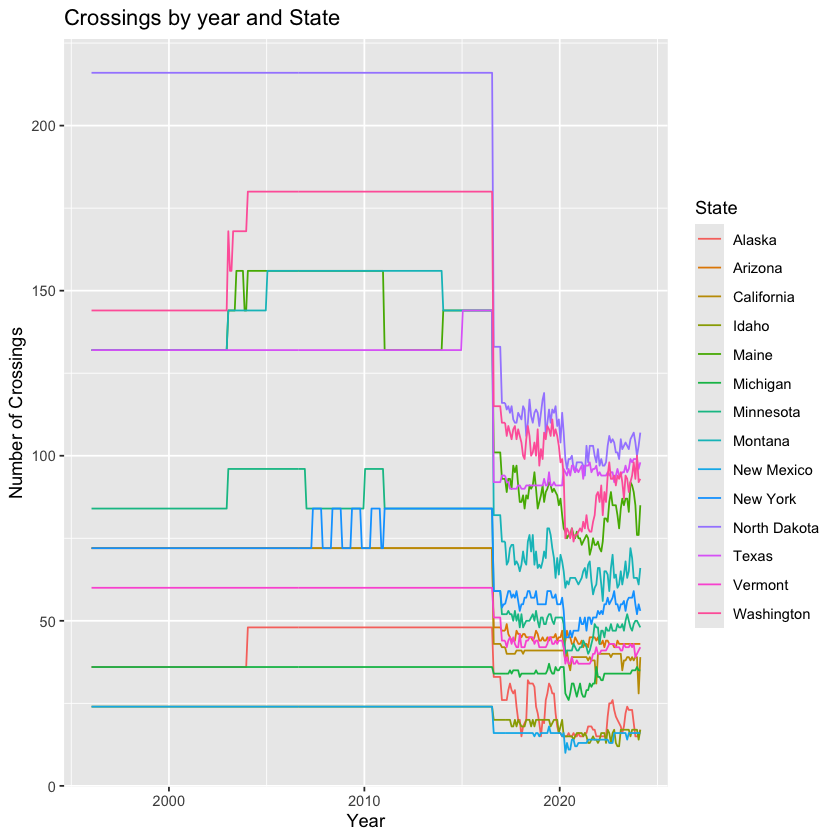

In [10]:
# crossings by state
crossing_by_state <- crossing %>%
  group_by(State, Date) %>%
  summarise(crossings = n(), .groups = "drop")

# plot
ggplot(crossing_by_state, aes(x = Date, y = crossings, color = factor(State))) +
  geom_line() +
  labs(x = "Year", y = "Number of Crossings", color = "State") +
  scale_color_discrete(name = "State") +
ggtitle('Crossings by year and State')

The States with the highest crossing rates are North Dakota, Washington and over most recent years, Texas.

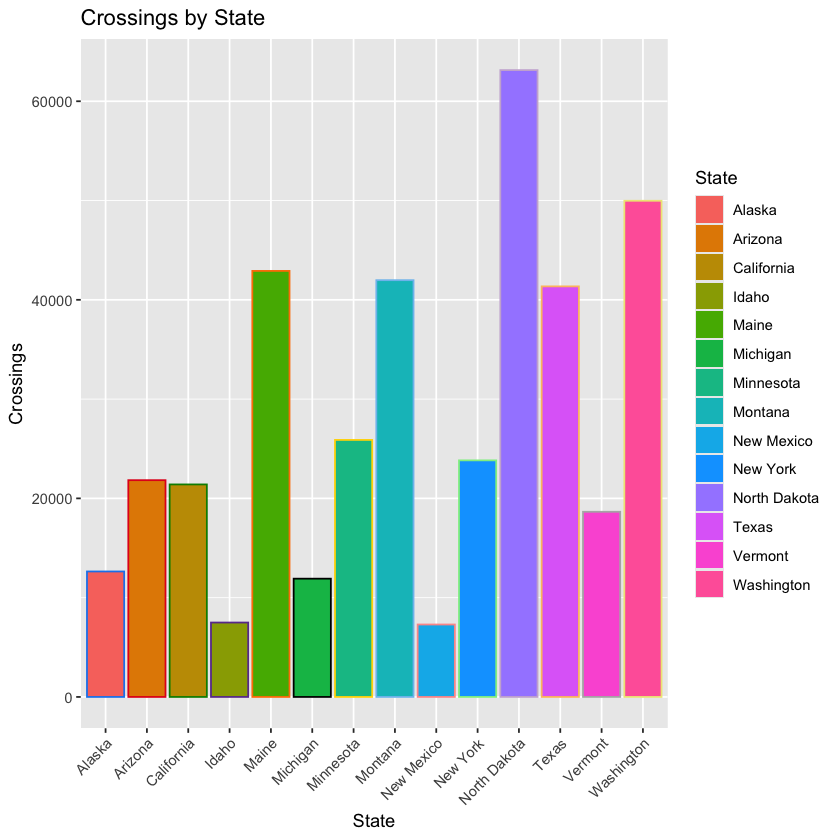

In [11]:
# barplot for crossings by state

# palette with 14 colors
c14 <- c(
  "dodgerblue2", "#E31A1C", # red
  "green4",
  "#6A3D9A", # purple
  "#FF7F00", # orange
  "black", "gold1",
  "skyblue2", "#FB9A99", # lt pink
  "palegreen2",
  "#CAB2D6", # lt purple
  "#FDBF6F", # lt orange
  "gray70", "khaki2"
)

# plot
ggplot(crossing, aes(x = State, fill = State)) +
  geom_bar(color = c14) +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
    labs(x = 'State', y = 'Crossings') +
    ggtitle('Crossings by State')

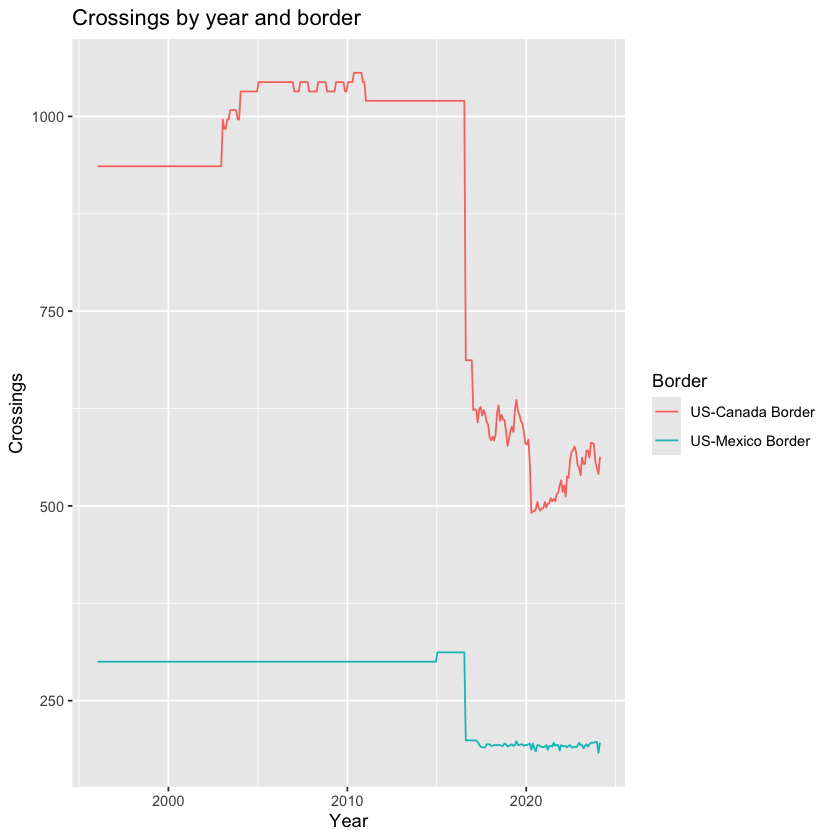

In [12]:
# crossing by border
crossing_by_border <- crossing %>%
  group_by(Border, Date) %>%
  summarise(crossings = n(), .groups = 'drop')

# plot
ggplot(crossing_by_border, aes(x = Date, y = crossings, color = factor(Border))) +
  geom_line() +
  labs(x = "Year", y = "Crossings", color = "Border") +
  scale_color_discrete(name = "Border") +
    ggtitle('Crossings by year and border')

There are consistently more crossings in the US-Canada Border, across all years.

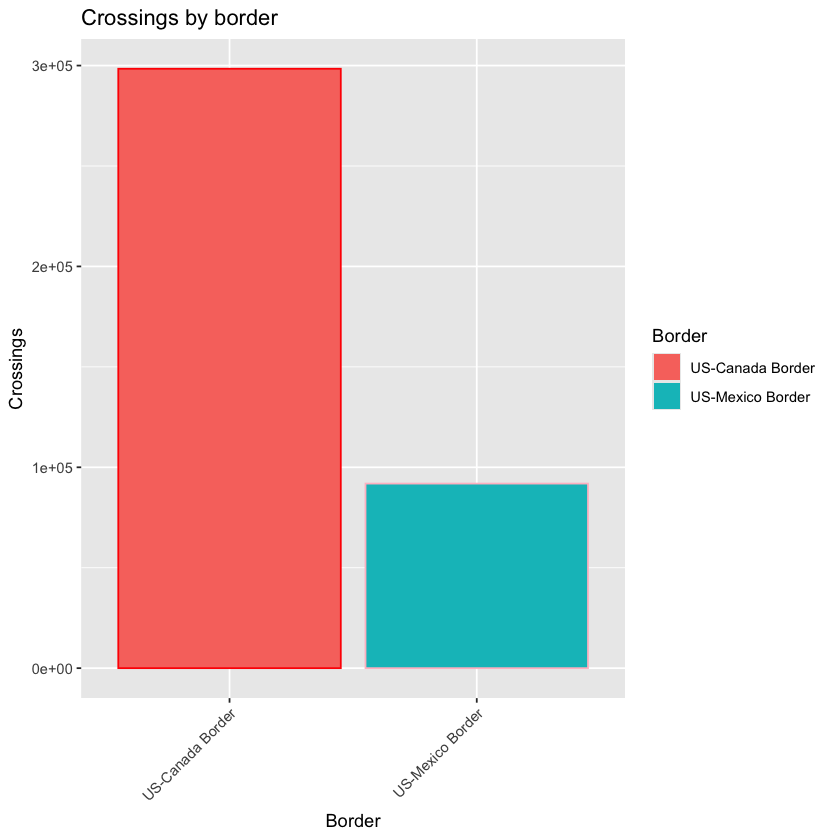

In [13]:
# total crossings by border
ggplot(crossing, aes(x = Border, fill = Border)) +
  geom_bar(color = c('red', 'pink')) +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
    labs(x = 'Border', y = 'Crossings') +
    ggtitle('Crossings by border')

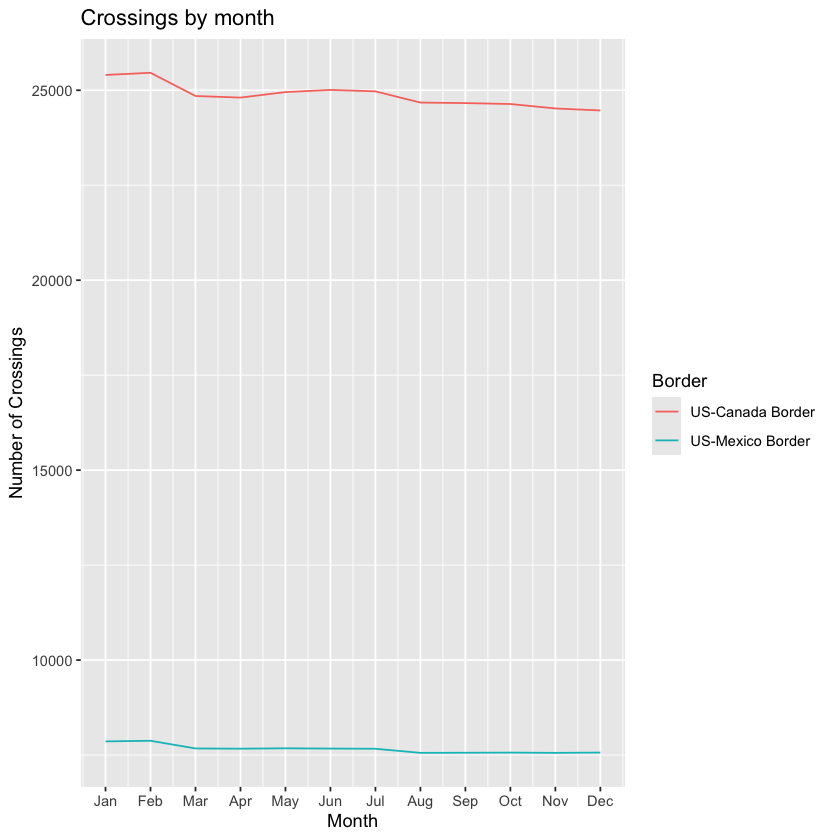

In [14]:
# crossings by border and month
crossing$month <- month(crossing$Date)
crossing_by_border <- crossing %>%
  group_by(Border, month) %>%
  summarise(crossings = n(), .groups = 'drop')

# plot
ggplot(crossing_by_border, aes(x = month, y = crossings, color = factor(Border))) +
  geom_line() +
  labs(x = "Month", y = "Number of Crossings", color = "Border") +
  scale_color_discrete(name = "Border") +
    scale_x_continuous(breaks = 1:12, labels = month.abb) +
    ggtitle('Crossings by month')


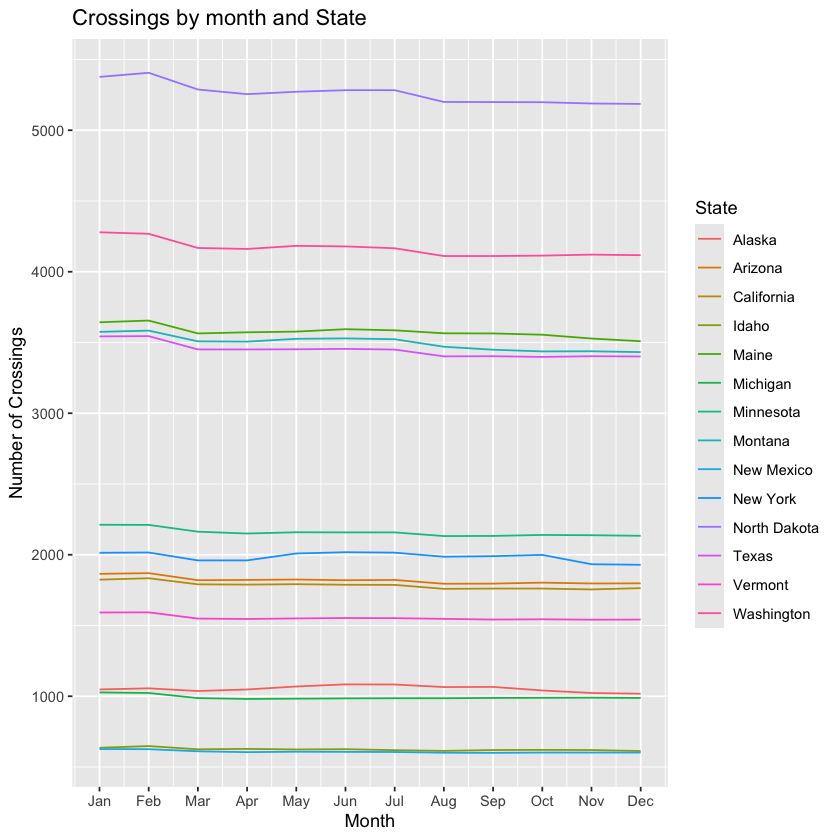

In [15]:
# crossings by State and month
crossing_by_state <- crossing %>%
  group_by(State, month) %>%
  summarise(crossings = n(), .groups = 'drop')

# plot
ggplot(crossing_by_state, aes(x = month, y = crossings, color = factor(State))) +
  geom_line() +
  labs(x = "Month", y = "Number of Crossings", color = "State") +
  scale_color_discrete(name = "State") +
    scale_x_continuous(breaks = 1:12, labels = month.abb) +
    ggtitle('Crossings by month and State')


Crossings by month vary the most along the Canadian border, affecting crossings in the States of North Dakota and Washington. Crossings on the Mexican border are more stable across the year, with no great differences between winter and summer months.

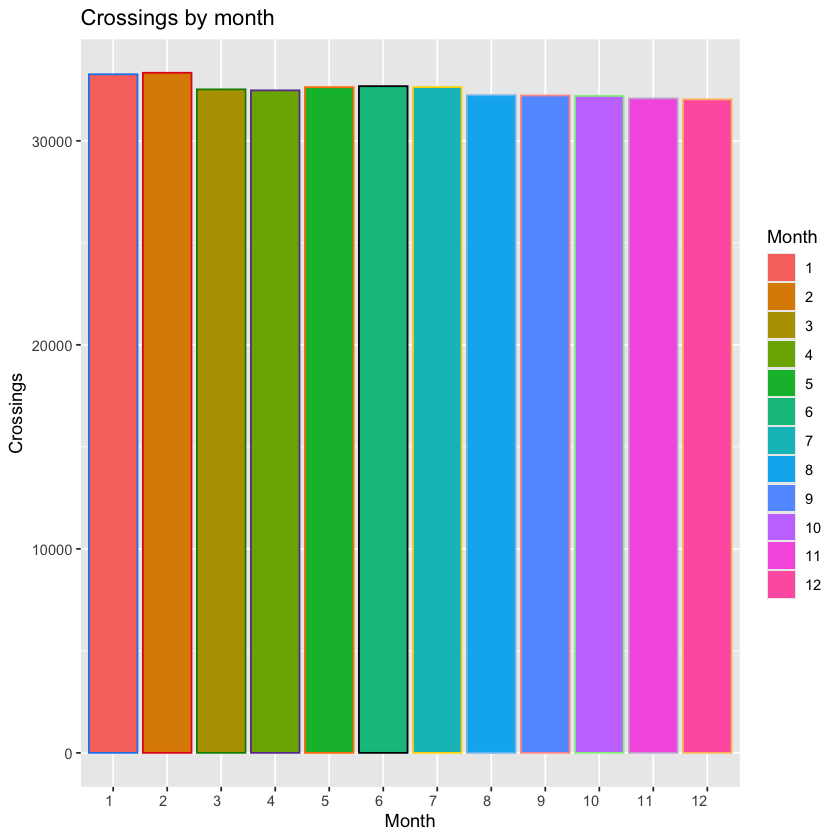

In [16]:
# total crossings by month
c12 <- c(
  "dodgerblue2", "#E31A1C", # red
  "green4",
  "#6A3D9A", # purple
  "#FF7F00", # orange
  "black", "gold1",
  "skyblue2", "#FB9A99", # lt pink
  "palegreen2",
  "#CAB2D6", # lt purple
  "#FDBF6F" # lt orange
)

# plot
ggplot(crossing, aes(x = factor(month), fill = factor(month))) +
  geom_bar(color = c12) +
    theme(axis.text.x=element_text(angle=0, hjust=1)) +
    labs(x = 'Month', y = 'Crossings', fill = 'Month') +
    ggtitle('Crossings by month')

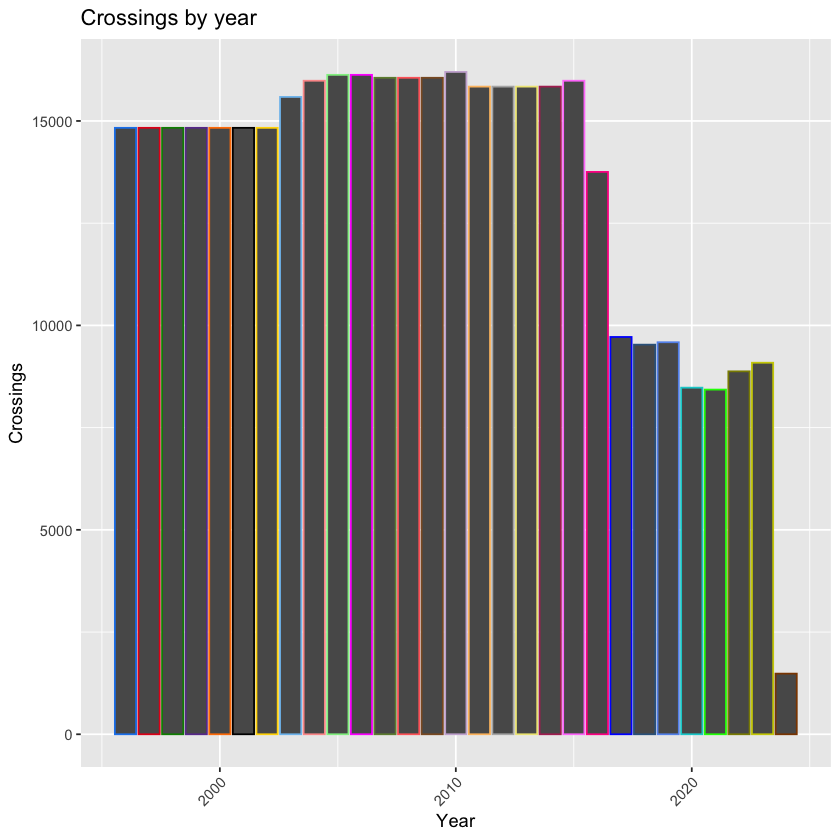

In [17]:
# total crossings by year
crossing$year <- year(crossing$Date)

# define palette
c29 <- c(
  "dodgerblue2", "#E31A1C", # red
  "green4",
  "#6A3D9A", # purple
  "#FF7F00", # orange
  "black", "gold1",
  "skyblue2", "#FB9A99", # lt pink
  "palegreen2", "magenta", "darkolivegreen4", 'indianred1', 'tan4',
  "#CAB2D6", # lt purple
  "#FDBF6F", # lt orange
  "gray70", "khaki2",
  "maroon", "orchid1", "deeppink1", "blue1", "steelblue4", "cornflowerblue",
  "darkturquoise", "green1", "yellow4", "yellow3",
  "darkorange4"
)

# plot
ggplot(crossing, aes(x = year), fill = factor(year)) +
geom_bar(color = c29) +
theme(axis.text.x=element_text(angle=45, hjust=1)) +
labs(x = 'Year', y = 'Crossings', fill = 'Year') +
    ggtitle('Crossings by year')

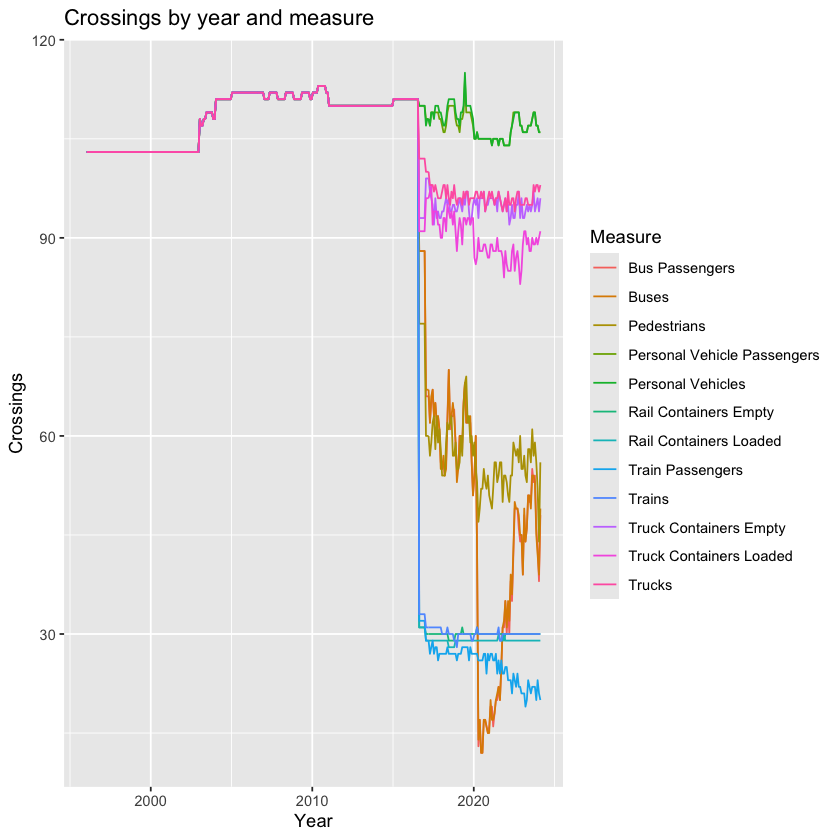

In [18]:
# crossings by measure and year
crossing_by_border <- crossing %>%
  group_by(Measure, Date) %>%
  summarise(crossings = n(), .groups = 'drop')

# plot
ggplot(crossing_by_border, aes(x = Date, y = crossings, color = factor(Measure))) +
  geom_line() +
  labs(x = "Year", y = "Number of Crossings", color = "Measure") +
  scale_color_discrete(name = "Measure") +
    labs(x = 'Year', y = 'Crossings', fill = 'Measure') +
    ggtitle('Crossings by year and measure')

Since 2016, crossings by personal vehicle and personal vehicle passengers are the most common.

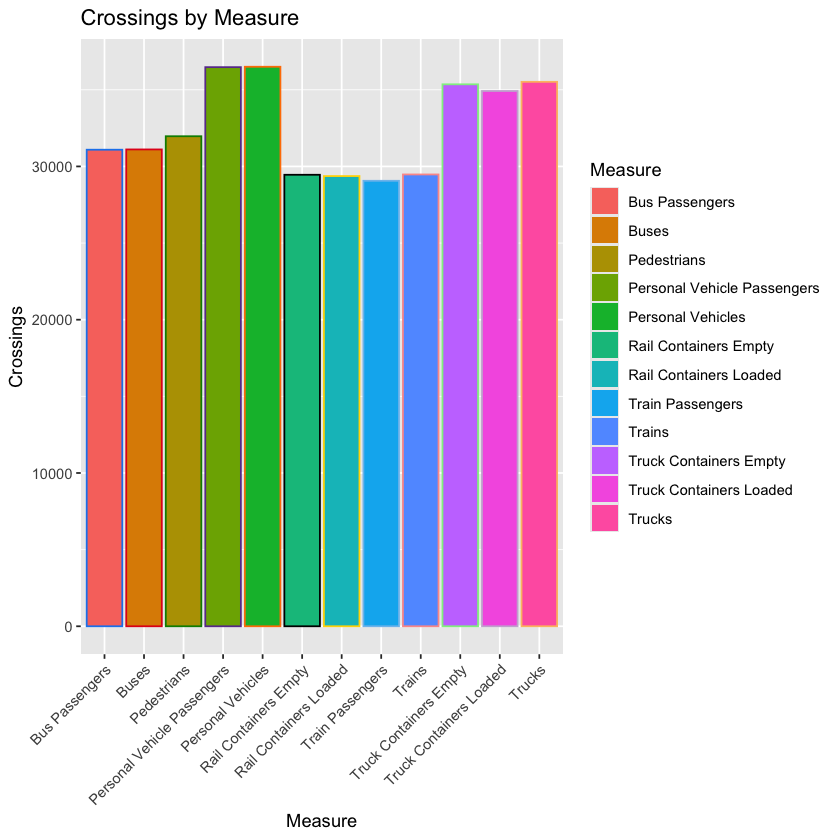

In [19]:
# total crossings by measure
ggplot(crossing, aes(x = factor(Measure), fill = factor(Measure))) +
  geom_bar(color = c12) +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
    labs(x = 'Measure', y = 'Crossings', fill = 'Measure') +
    ggtitle('Crossings by Measure')

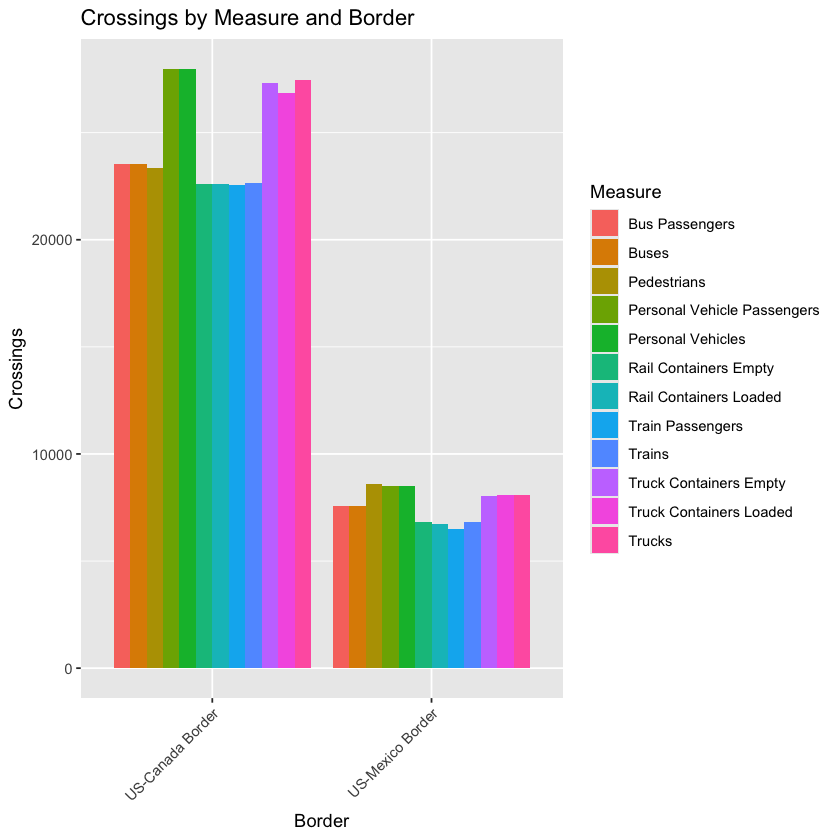

In [20]:
# disclose which measures are most used to cross by border (through grouping)
measure_by_border <- crossing %>%
  group_by(Measure, Border) %>%
  summarise(crossings = n(), .groups = 'drop')

# combined data as a grouped bar chart
ggplot(measure_by_border, aes(x = Border, y = crossings, fill = Measure)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  labs(x = "Border", y = "Crossings", fill = "Measure") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Crossings by Measure and Border")

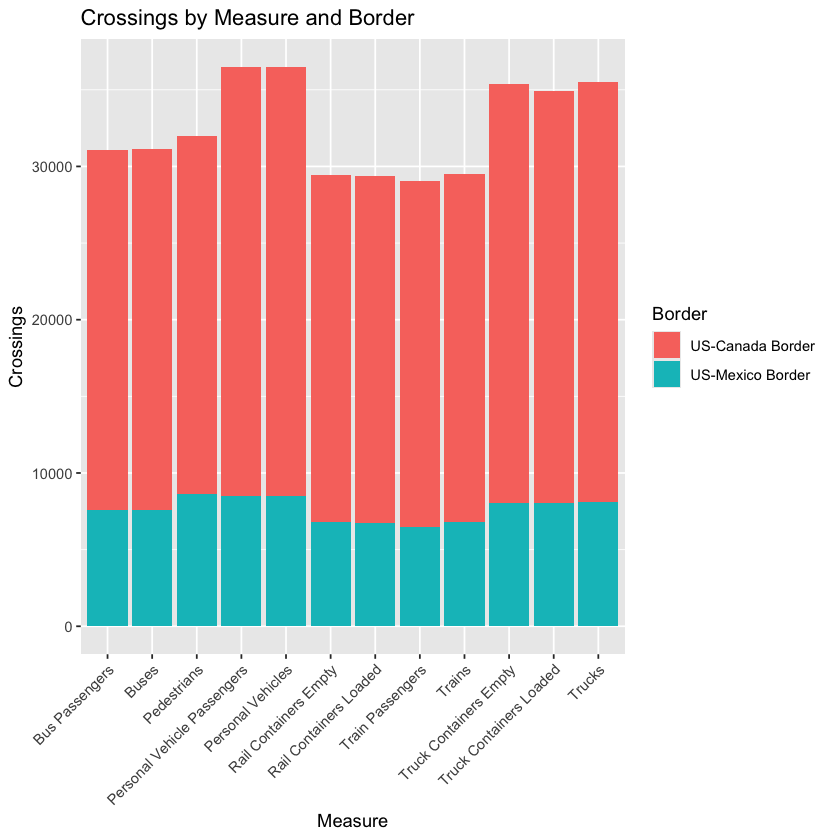

In [21]:
# combined data as a stacked bar chart
ggplot(measure_by_border, aes(x = Measure, y = crossings, fill = Border)) +
  geom_bar(stat = "identity", position = 'stack') +
  labs(x = "Measure", y = "Crossings", fill = "Border") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Crossings by Measure and Border")

Interestingly enough, the most used method to cross the Mexican border is by foot, whereas that is rather uncommon for the Canadian border.

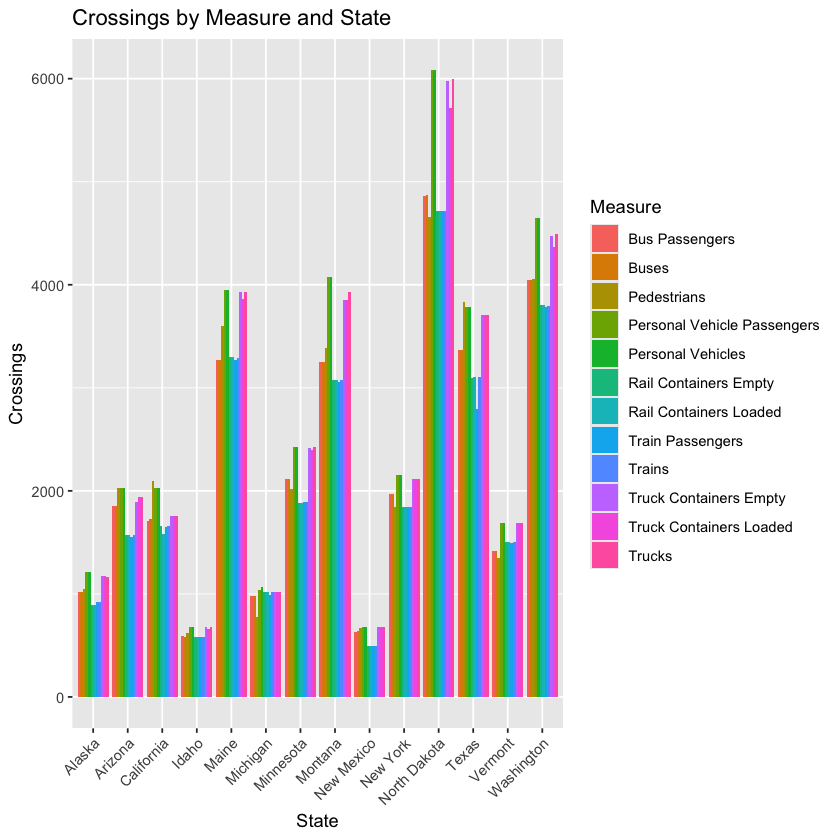

In [22]:
# measure of crossing by State
measure_by_state <- crossing %>%
  group_by(Measure, State) %>%
  summarise(crossings = n(), .groups = 'drop')

# combined data as a grouped bar chart
ggplot(measure_by_state, aes(x = State, y = crossings, fill = Measure)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  labs(x = "State", y = "Crossings", fill = "Measure") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Crossings by Measure and State")

Consistently with what was found before, Texas and California, which are near the Mexican border, see pedestrians as the predominant measure for crossing; whereas most northern States have a prevalence of personal vehicles passengers and personal vehicles.

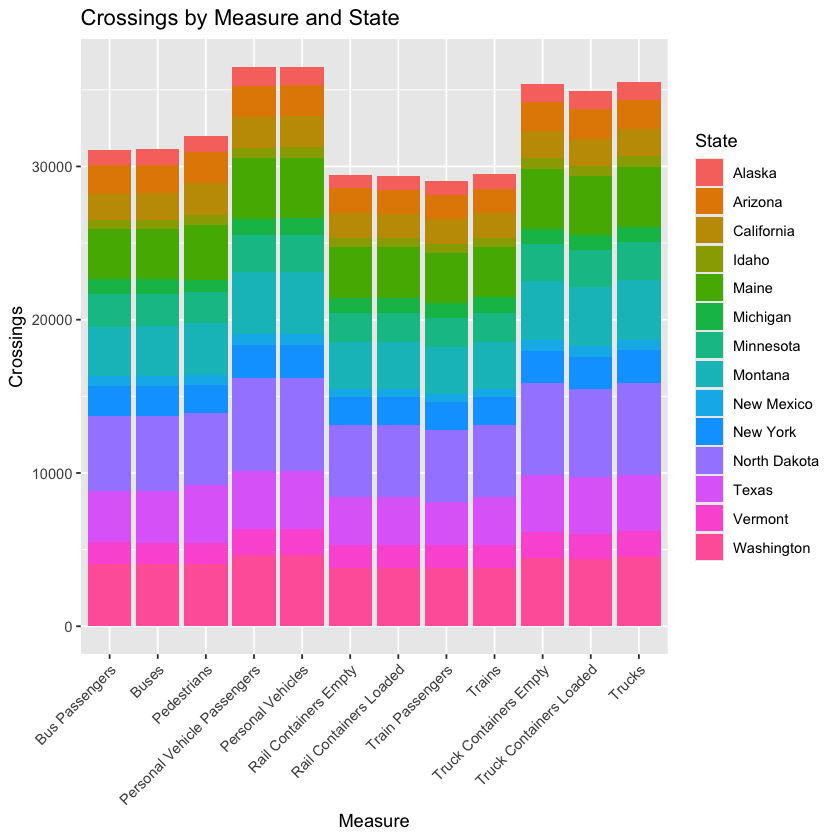

In [23]:
# combined data as a stacked bar chart
ggplot(measure_by_state, aes(x = Measure, y = crossings, fill = State)) +
  geom_bar(stat = "identity", position = 'stack') +
  labs(x = "Measure", y = "Crossings", fill = "State") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Crossings by Measure and State")

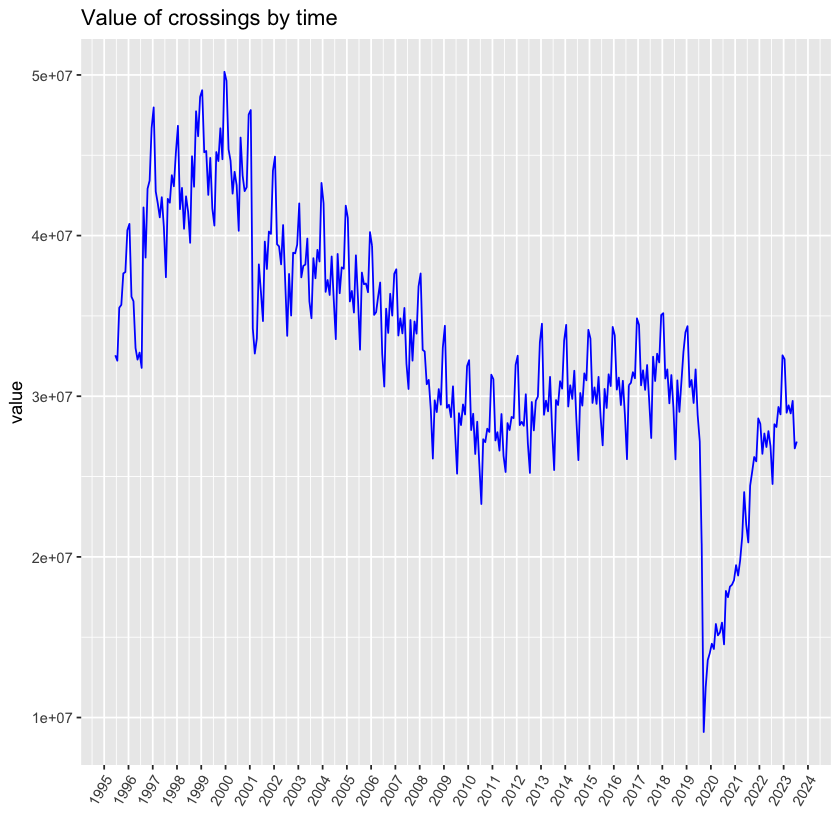

In [24]:
# value of crossing by year
value_by_month <- crossing %>%
  group_by(date = Date) %>%
  summarise(value = sum(Value))

ggplot(value_by_month, aes(date, value)) + 
geom_line(color = 'blue') +
xlab('') +
scale_x_date(date_breaks = "12 months", date_labels = "%Y") +
theme(axis.text.x=element_text(angle=60, hjust=1)) +
ggtitle('Value of crossings by time')

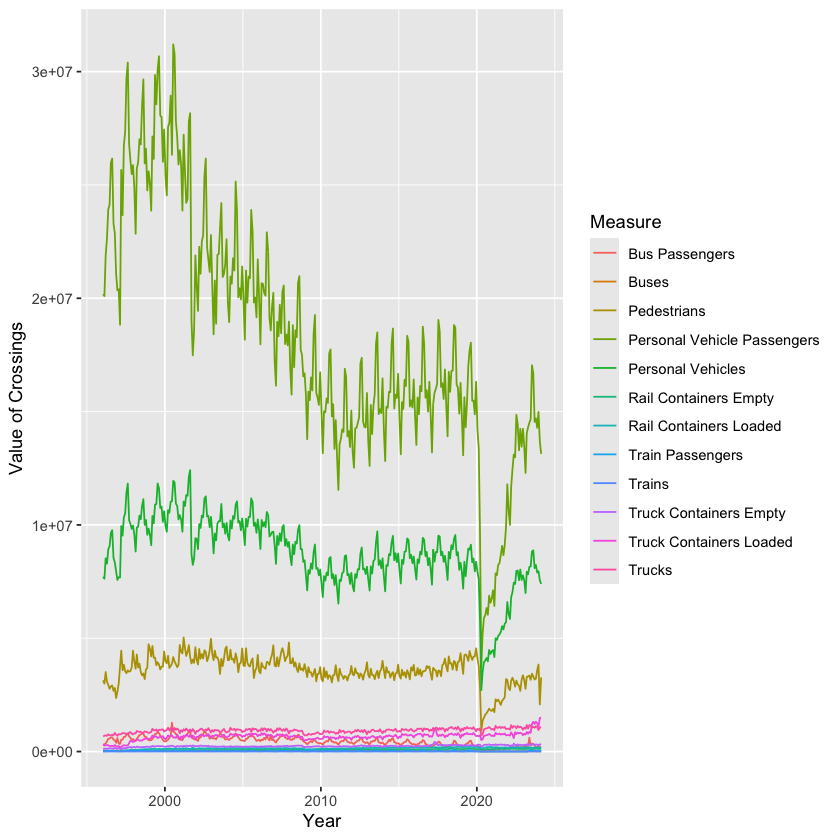

In [25]:
# value of crossing per year, by measure
value_by_measure <- crossing %>%
  group_by(Date, Measure) %>%
  summarise(value = sum(Value), .groups = 'drop')

ggplot(value_by_measure, aes(x = Date, y = value, color = factor(Measure), group = Measure)) +
  geom_line() +
  labs(x = "Year", y = "Value of Crossings", color = "Measure") +
  scale_color_discrete(name = "Measure")

Personal vehicles remain the most common crossing measure, however, their value is decreasing over time. On the other hand, the value for truckes is slightly increasing over time. Personal vehicles has been quite steady over time.

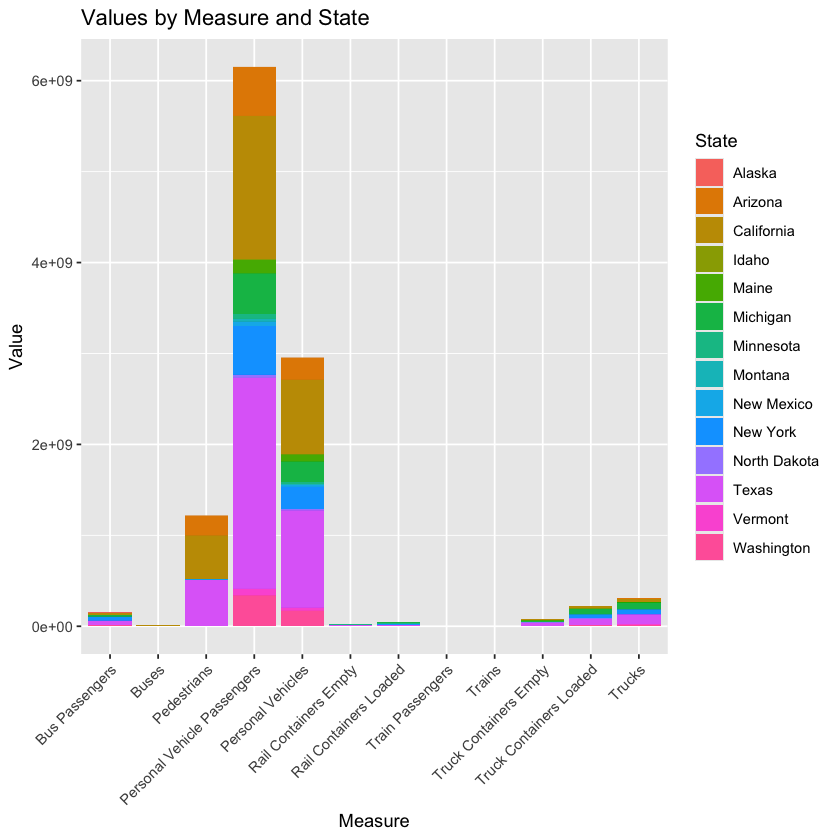

In [26]:
# value by State and Measure
ggplot(crossing, aes(x = Measure, y = Value, fill = State)) +
  geom_bar(stat = "identity", position = 'stack') +
  labs(x = "Measure", y = "Value", fill = "State") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Values by Measure and State")

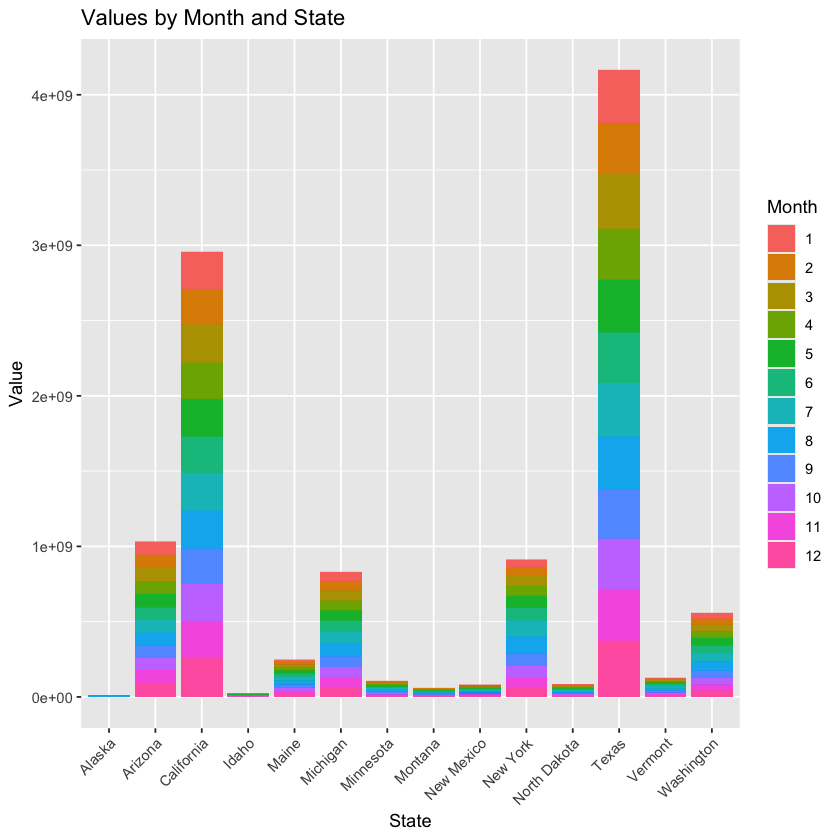

In [27]:
# value by State and month
ggplot(crossing, aes(x = State, y = Value, fill = factor(month))) +
  geom_bar(stat = "identity", position = 'stack') +
  labs(x = "State", y = "Value", fill = "Month") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Values by Month and State")

The value of crossings is rather stable across all months, and it mainly depends on the State.

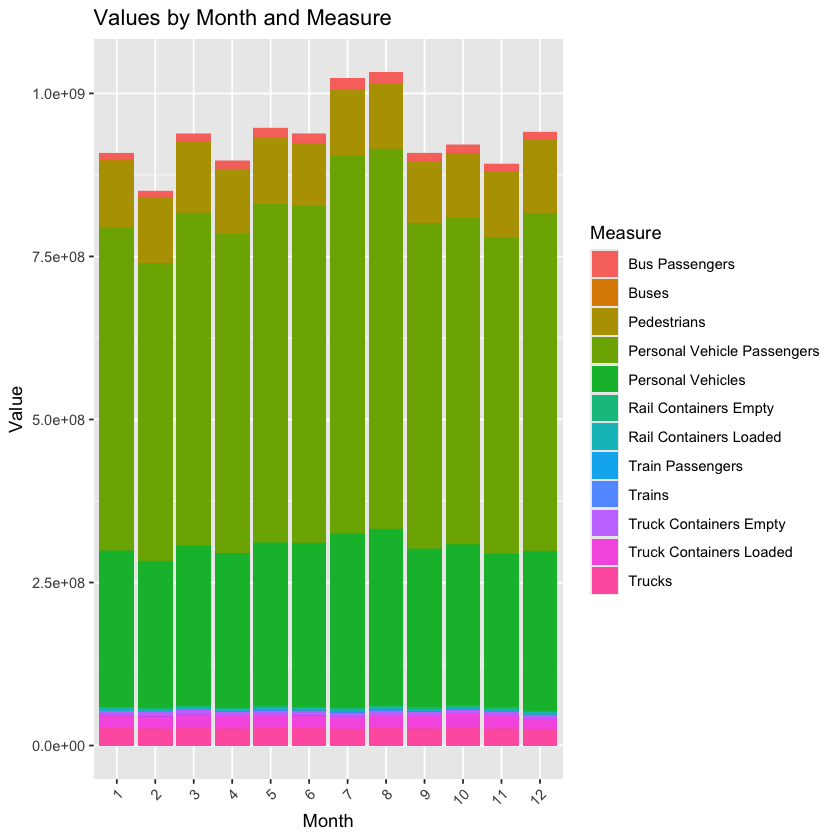

In [28]:
# value by Month and Measure
ggplot(crossing, aes(x = factor(month), y = Value, fill = Measure)) +
  geom_bar(stat = "identity", position = 'stack') +
  labs(x = "Month", y = "Value", fill = "Measure") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Values by Month and Measure")

Unlike expectations, what changes during summer months is the number of people transported on personal vehicles, which increases.

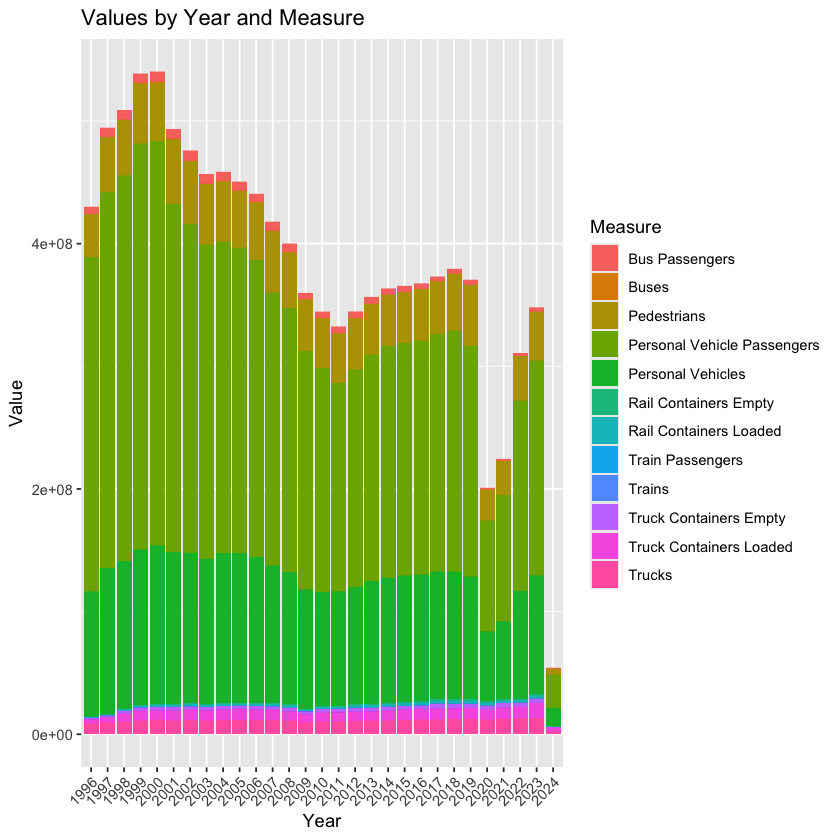

In [29]:
# value of crossings by year and measure
ggplot(crossing, aes(x = factor(year), y = Value, fill = Measure)) +
  geom_bar(stat = "identity", position = 'stack') +
  labs(x = "Year", y = "Value", fill = "Measure") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  ggtitle("Values by Year and Measure")

The value of crossings by personal vehicle passengers, personal vehicles and pedestrians has decreased over time. However, the value of trucks and truck containers has slowly, but steadily increased, with no exception for the pandemic years.

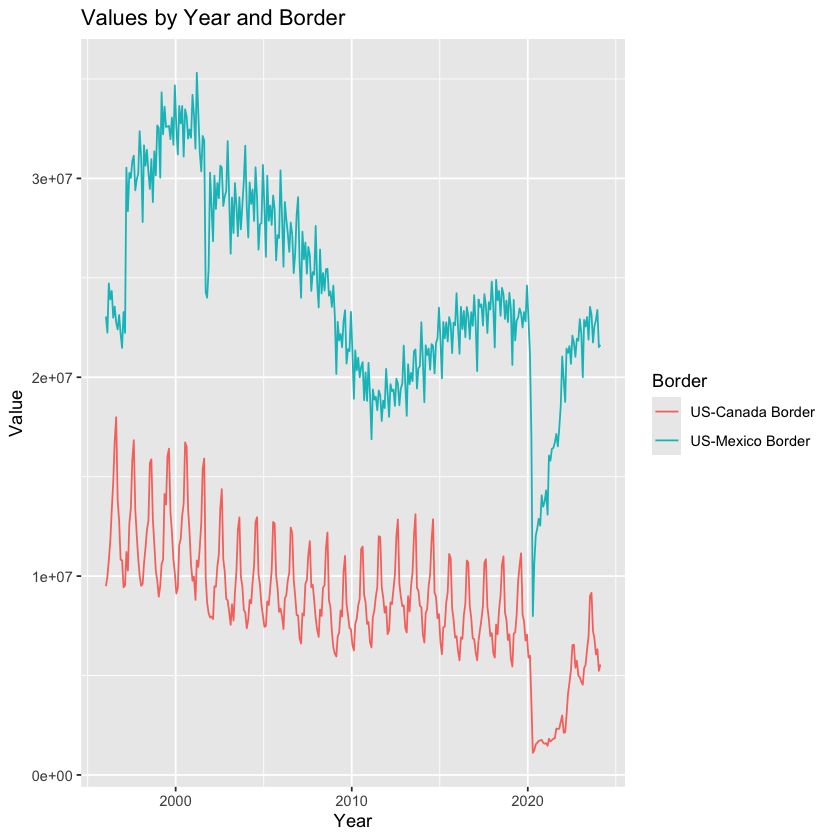

In [30]:
# value of crossings by border and time
value_by_border <- crossing %>%
  group_by(Border, Date) %>%
  summarise(value = sum(Value), .groups = 'drop')

ggplot(value_by_border, aes(x = Date, y = value, color = factor(Border), group = Border)) +
  geom_line() +
  labs(x = "Year", y = "Value", color = "Border") +
  scale_color_discrete(name = "Border") +
    ggtitle("Values by Year and Border")


The value of crossing is higher for the US-Mexico border across all years, although crossing is decreasing for the Mexican border more steadily than it is decreasing for the Canadian border.

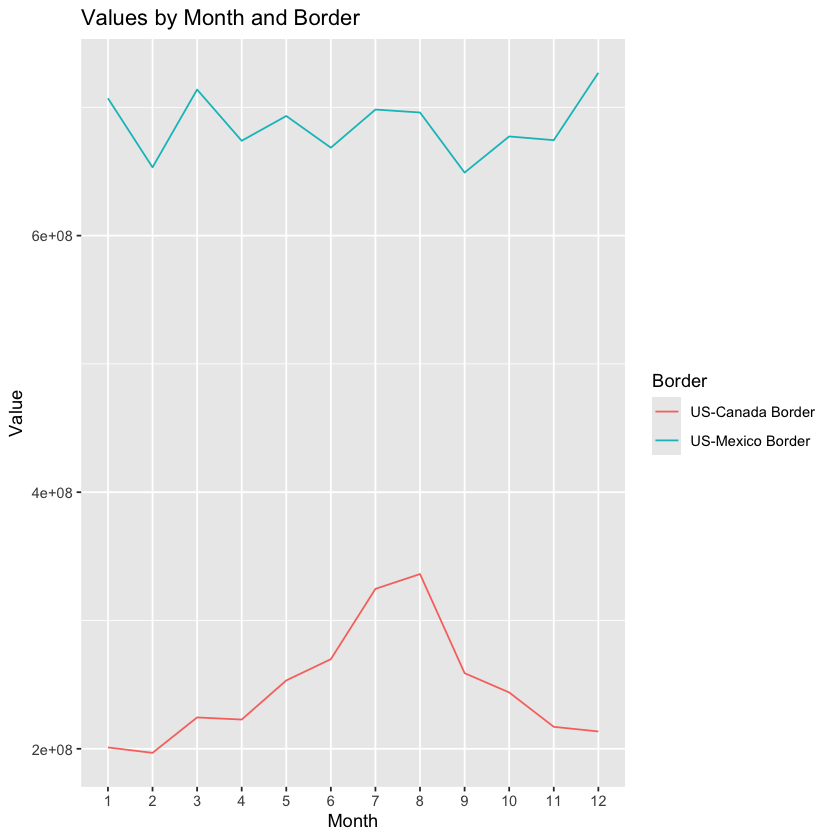

In [31]:
# value of crossings by border and month
value_by_border <- crossing %>%
  group_by(Border, month) %>%
  summarise(value = sum(Value), .groups = 'drop')

ggplot(value_by_border, aes(x = factor(month), y = value, color = factor(Border), group = Border)) +
  geom_line() +
  labs(x = "Month", y = "Value", color = "Border") +
  scale_color_discrete(name = "Border") +
    ggtitle("Values by Month and Border")

The value of crossing is overall higher for the US-Mexico border. This means that, with less attempts for crossing, more people get to cross the border. For what concerns the Canadian border, in the summer months, the overall value for crossings tends to increase drastically compared to the rest of the year.

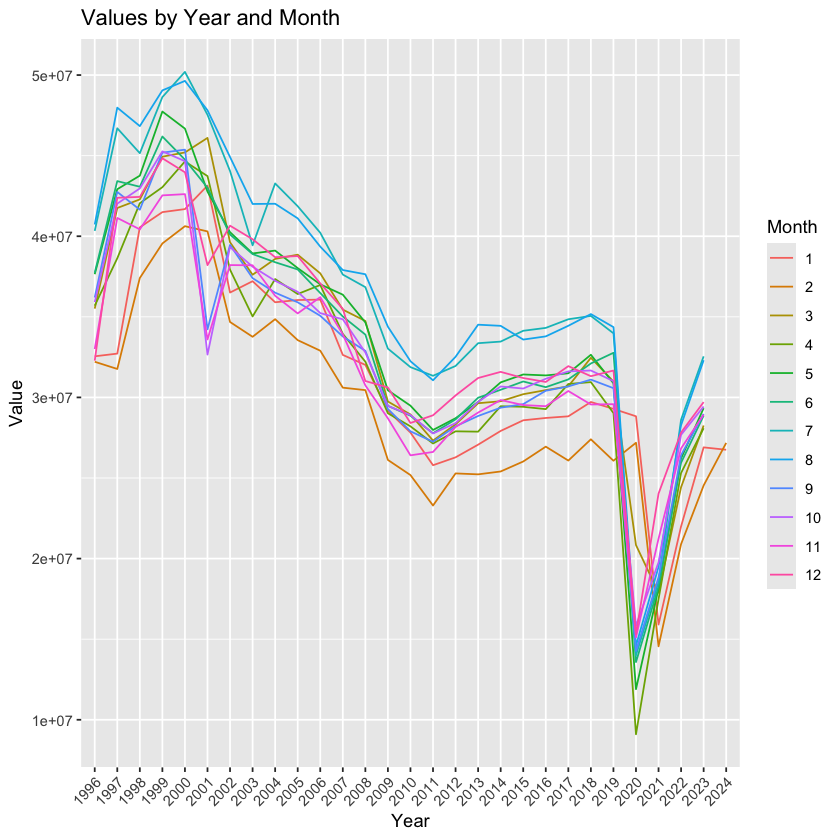

In [32]:
# value of crossing by month and year
value_by_period <- crossing %>%
  group_by(year, month) %>%
  summarise(value = sum(Value), .groups = 'drop')

ggplot(value_by_period, aes(x = factor(year), y = value, color = factor(month), group = month)) +
  geom_line() +
  labs(x = "Year", y = "Value", color = "Month") +
  scale_color_discrete(name = "Month") +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
      ggtitle("Values by Year and Month")

The value for crossings has been overall higher in the summer months (July and August) steadily across all years, with the exception of the pandemic years.

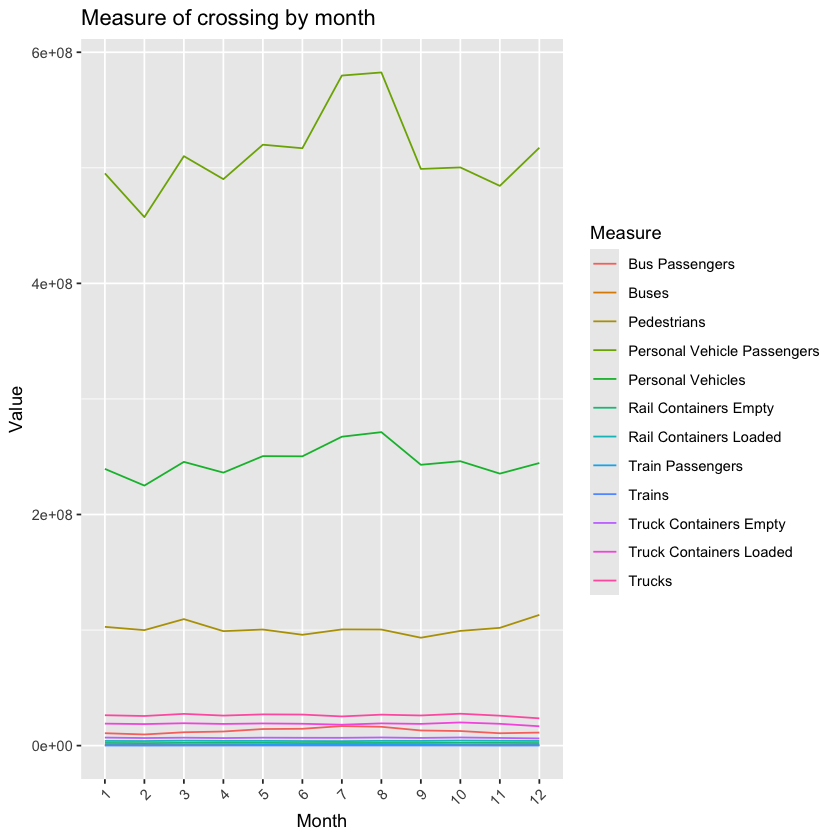

In [33]:
# measure of crossing by month
value_by_period <- crossing %>%
  group_by(month, Measure) %>%
  summarise(value = sum(Value), .groups = 'drop')

ggplot(value_by_period, aes(x = factor(month), y = value, color = Measure, group = Measure)) +
  geom_line() +
  labs(x = "Month", y = "Value", color = "Measure") +
  scale_color_discrete(name = "Measure") +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
      ggtitle("Measure of crossing by month")

The value of crossing is higher for personal vehicle passengers across all months of the year, followed by personal vehicles and pedestrians.

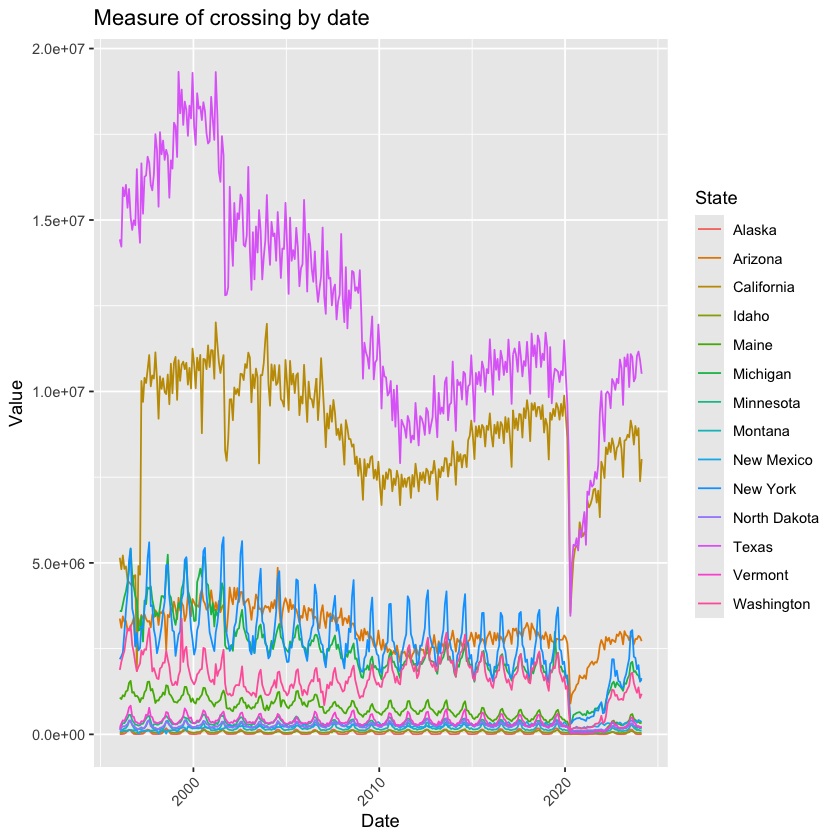

In [34]:
# value of crossing by State and Year
value_by_state <- crossing %>%
  group_by(Date, State) %>%
  summarise(value = sum(Value), .groups = 'drop')

ggplot(value_by_state, aes(x = Date, y = value, color = State, group = State)) +
  geom_line() +
  labs(x = "Date", y = "Value", color = "State") +
  scale_color_discrete(name = "State") +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
      ggtitle("Measure of crossing by date")

The value of crossings is higher for all years in Texas, where more people cross in total, followed by California. The values of crossingsi in these states, however, has tended to decrease over time, particularly in most recent years.

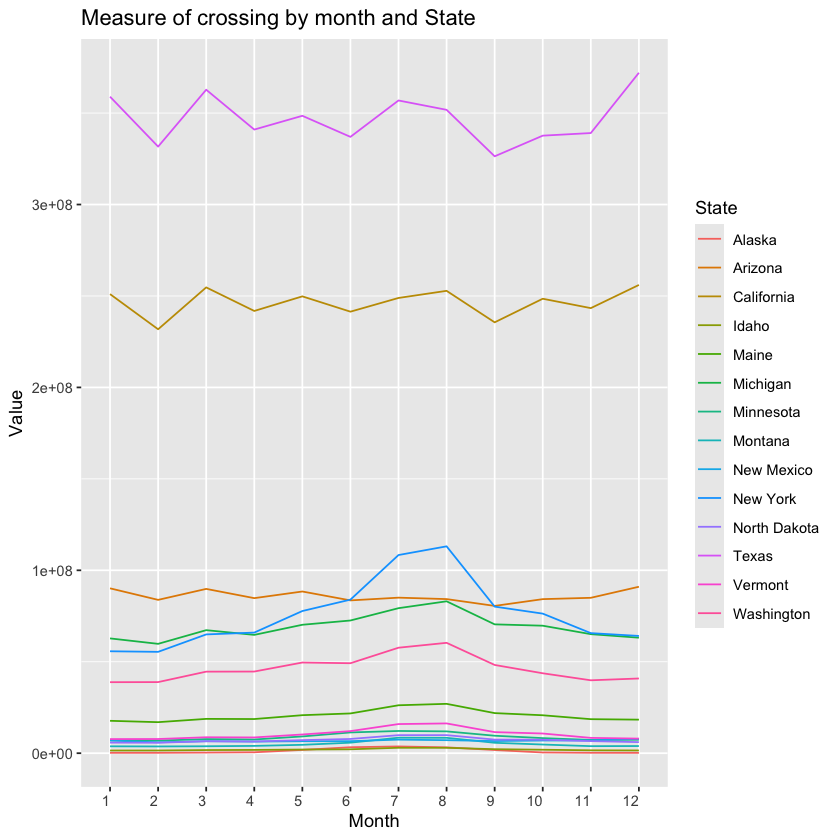

In [35]:
# value of crossing by State and Month
value_by_state <- crossing %>%
  group_by(month, State) %>%
  summarise(value = sum(Value), .groups = 'drop')

ggplot(value_by_state, aes(x = factor(month), y = value, color = State, group = State)) +
  geom_line() +
  labs(x = "Month", y = "Value", color = "State") +
  scale_color_discrete(name = "State") +
    theme(axis.text.x=element_text(angle=0, hjust=1)) +
      ggtitle("Measure of crossing by month and State")

The value of crossings is higher for Texas and California in general across all months. However, States that share a border with the US-Canadian border see a slight increase in the value of crossings during summer months.